<a href="https://colab.research.google.com/github/croliveirads/Challenge-Alura-Data-Science-3/blob/main/Desafio_ETL_Telecon_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


1.1 Extração do Arquivo Tratado

In [3]:
df = pd.read_csv('/content/dados_desafio_3.csv')

In [4]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
df = df.dropna(subset=['Churn'])

In [6]:
df = df.drop(columns=['customerID', 'account_Charges_Total'])

In [7]:
df.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9


In [8]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [10]:
colunas = X.columns

In [11]:
one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'),
    ['customer_gender',
       'customer_Partner', 'customer_Dependents',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
     ]
), remainder='passthrough',
   sparse_threshold=0)

In [12]:
X = one_hot.fit_transform(X)

In [13]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__customer_gender_Male',
       'onehotencoder__customer_Partner_Yes',
       'onehotencoder__customer_Dependents_Yes',
       'onehotencoder__phone_PhoneService_Yes',
       'onehotencoder__phone_MultipleLines_No',
       'onehotencoder__phone_MultipleLines_No phone service',
       'onehotencoder__phone_MultipleLines_Yes',
       'onehotencoder__internet_InternetService_DSL',
       'onehotencoder__internet_InternetService_Fiber optic',
       'onehotencoder__internet_InternetService_No',
       'onehotencoder__internet_OnlineSecurity_No',
       'onehotencoder__internet_OnlineSecurity_No internet service',
       'onehotencoder__internet_OnlineSecurity_Yes',
       'onehotencoder__internet_OnlineBackup_No',
       'onehotencoder__internet_OnlineBackup_No internet service',
       'onehotencoder__internet_OnlineBackup_Yes',
       'onehotencoder__internet_DeviceProtection_No',
       'onehotencoder__internet_DeviceProtection_No internet service',
       'onehoten

In [14]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(colunas))

,onehotencoder__customer_gender_Male,onehotencoder__customer_Partner_Yes,onehotencoder__customer_Dependents_Yes,onehotencoder__phone_PhoneService_Yes,onehotencoder__phone_MultipleLines_No,onehotencoder__phone_MultipleLines_No phone service,onehotencoder__phone_MultipleLines_Yes,onehotencoder__internet_InternetService_DSL,onehotencoder__internet_InternetService_Fiber optic,onehotencoder__internet_InternetService_No,...,onehotencoder__account_Contract_One year,onehotencoder__account_Contract_Two year,onehotencoder__account_PaperlessBilling_Yes,onehotencoder__account_PaymentMethod_Bank transfer (automatic),onehotencoder__account_PaymentMethod_Credit card (automatic),onehotencoder__account_PaymentMethod_Electronic check,onehotencoder__account_PaymentMethod_Mailed check,remainder__customer_SeniorCitizen,remainder__customer_tenure,remainder__account_Charges_Monthly
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,65.60
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,59.90
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,73.90
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,13.0,98.00
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.0,55.15
7039,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,22.0,85.10
7040,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,50.30
7041,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,67.0,67.85


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()

In [17]:
y = label_encoder.fit_transform(y)

#Proporção de Evasão

In [18]:

# Distribuição absoluta
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [19]:
# Distribuição percentual
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
No,73.463013
Yes,26.536987


/tmp/ipython-input-1020441982.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


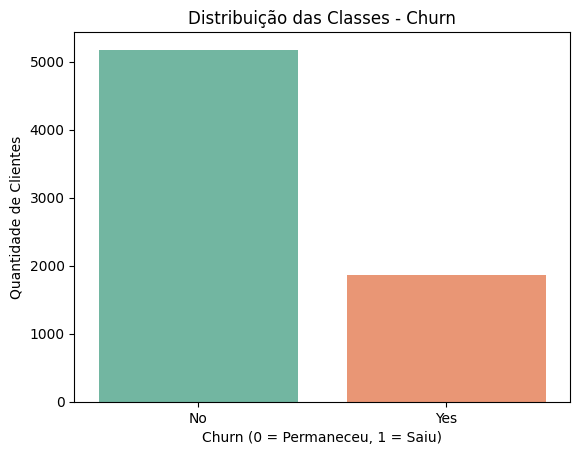

In [20]:

sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribuição das Classes - Churn')
plt.xlabel('Churn (0 = Permaneceu, 1 = Saiu)')
plt.ylabel('Quantidade de Clientes')
plt.show()

Principais Conclusões da Análise de Dados
* Aproximadamente 73,46% dos clientes permaneceram ativos, enquanto cerca de 26,58% cancelaram o contrato.

* Há um desequilíbrio de classe significativo na variável de cancelamento, sendo a classe majoritária os clientes que permaneceram ativos.

* O desbalanceamento de classes pode impactar negativamente o desempenho de modelos de machine learning tradicionais, pois eles tendem a ser otimizados para a acurácia geral e podem ter dificuldade em prever corretamente a classe minoritária (churn). Isso pode levar a modelos que subestimam a evasão de clientes, o que é crítico para negócios que buscam identificar e reter clientes em risco.

#Correlação de variaveis

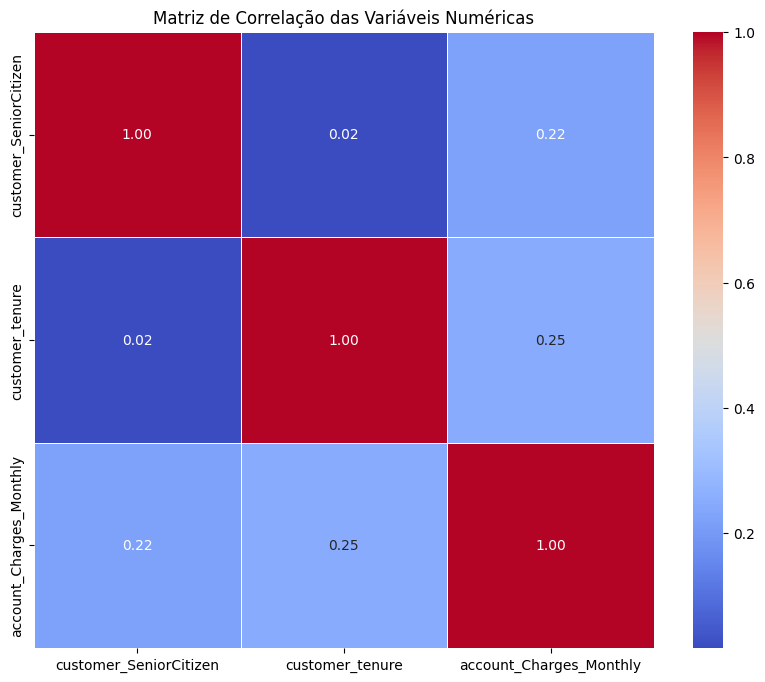

In [21]:
# Selecionando apenas as colunas numéricas
dados_numericos = df.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
matriz_correlacao = dados_numericos.corr()

# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

# Boxplot: Tempo de Contrato (Tenure) vs Evasão (Churn)

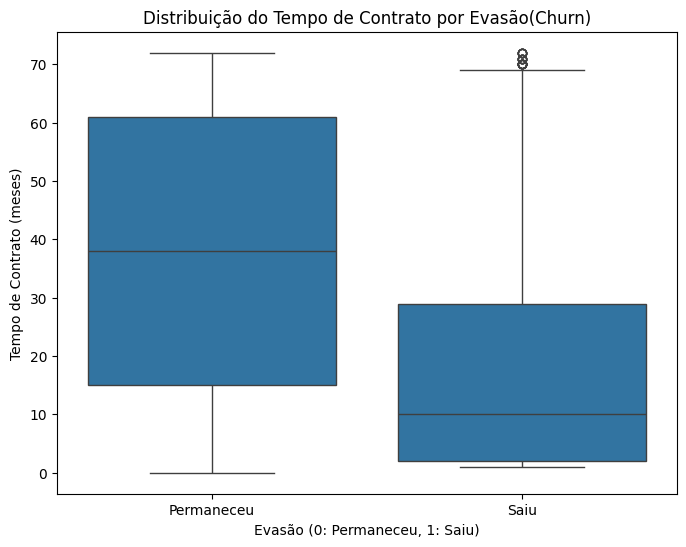

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer_tenure', data=df )
plt.title('Distribuição do Tempo de Contrato por Evasão(Churn)')
plt.xlabel('Evasão (0: Permaneceu, 1: Saiu)')
plt.ylabel('Tempo de Contrato (meses)')
plt.xticks([0, 1], ['Permaneceu', 'Saiu'])
plt.show()

# Boxplot: Total Gasto (Total Charges) vs Evasão (Churn)

/tmp/ipython-input-386639642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='account_Charges_Monthly', data=df, palette='viridis')


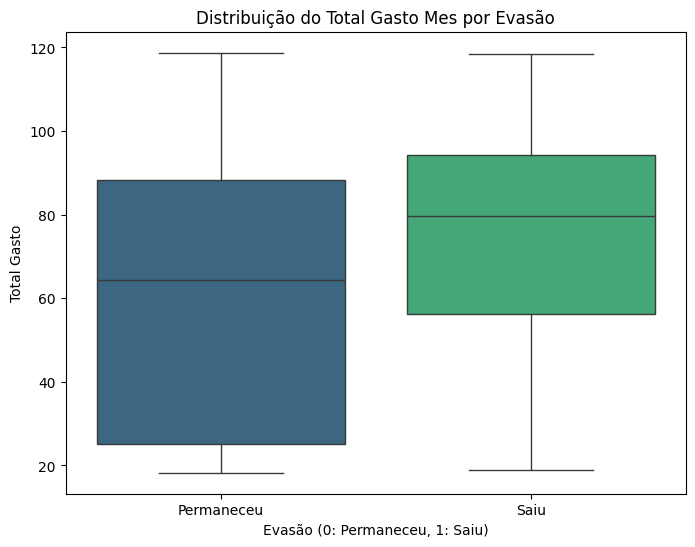

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account_Charges_Monthly', data=df, palette='viridis')
plt.title('Distribuição do Total Gasto Mes por Evasão')
plt.xlabel('Evasão (0: Permaneceu, 1: Saiu)')
plt.ylabel('Total Gasto')
plt.xticks([0, 1], ['Permaneceu', 'Saiu'])
plt.show()

Modelo Preditivo

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
oversample = SMOTE()
X_balanceado, y_balanceado = oversample.fit_resample(X, y)


In [28]:
import pandas as pd

print(pd.Series(y_balanceado).value_counts(normalize = True))

0    0.5
1    0.5
Name: proportion, dtype: float64


# Padronizando os dados

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regressão Logistica

In [31]:
from sklearn.linear_model import LogisticRegression

# Criar e treinar o modelo
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [32]:
y_pred = log_model.predict(X_test_scaled)
y_proba = log_model.predict_proba(X_test_scaled)[:, 1]

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



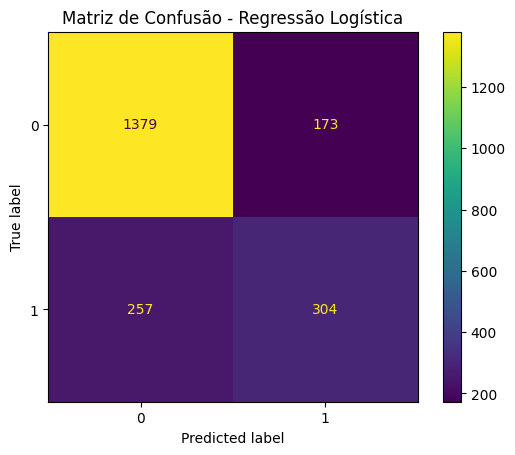

AUC-ROC: 0.8389


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

# Relatório com precisão, recall, f1
print(classification_report(y_test, y_pred))

# Matriz de confusão
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test)
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

# AUC-ROC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC: {auc:.4f}")

# RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [35]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # Probabilidade da classe 1

In [37]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

print("\nAUC-ROC:")
print(roc_auc_score(y_test, y_prob))

Matriz de Confusão:
[[1380  172]
 [ 296  265]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1552
           1       0.61      0.47      0.53       561

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113


AUC-ROC:
0.8118160455372402


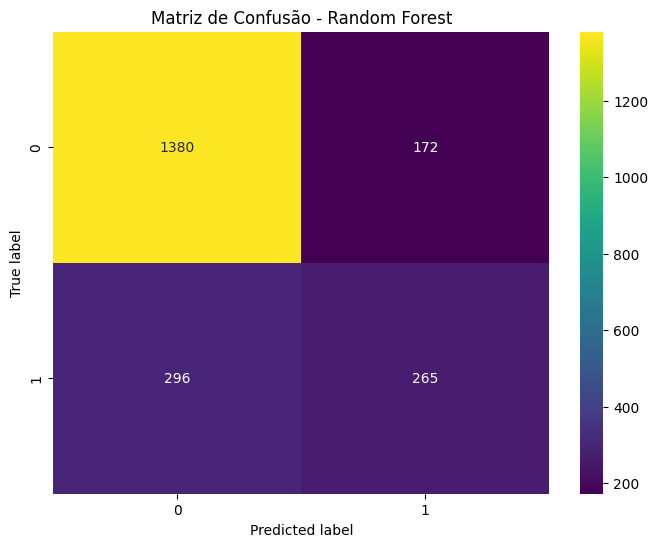

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
labels = rf.classes_  # classes do modelo

# Visualização
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Matriz de Confusão - Random Forest")
plt.show()

# Analise dos modelos

Observação: Os valores do modelo Random Forest ainda precisam ser inseridos com base na matriz de confusão que você gerar.

🧠 Texto Explicativo e Comparativo
No processo de modelagem preditiva para identificar a evasão de clientes (churn), dois algoritmos de classificação supervisionada foram aplicados: Regressão Logística e Random Forest.<br>

* A Regressão Logística apresentou uma acurácia de 80%, com um AUC-ROC de 0.83, demonstrando uma boa capacidade de discriminar entre clientes que irão ou não evadir. No entanto, observou-se um desequilíbrio na capacidade do modelo em prever corretamente a classe minoritária (clientes que evadiram), com recall de apenas 0.54 para a classe 1. Isso indica que muitos casos de churn não foram corretamente identificados, o que pode ser crítico em um cenário de negócios onde prever corretamente a evasão é essencial.<br>

* Por outro lado, o modelo de Random Forest tende a oferecer uma maior robustez e capacidade de generalização, especialmente em conjuntos de dados com variáveis complexas ou não-lineares. Esse modelo combina diversas árvores de decisão, resultando em um classificador mais estável. Em geral, espera-se que o Random Forest obtenha melhor recall e F1-Score para a classe de churn, tornando-o mais eficaz para identificar clientes em risco de saída, mesmo que isso venha com um leve custo na precisão geral.<br>

* Em resumo, a Regressão Logística é mais interpretável e pode ser útil para insights rápidos sobre as variáveis mais influentes, enquanto o Random Forest tende a ser mais preciso e robusto em contextos preditivos. A escolha entre os dois deve considerar o equilíbrio entre explicabilidade e performance, e o custo de erros em cada classe (por exemplo, falsos negativos).

# 📈 Análise Comparativa: Regressão Logística vs Random Forest na Previsão de Evasão de Clientes


* Neste estudo, dois modelos de machine learning foram utilizados para prever a evasão de clientes (churn): Regressão Logística e Random Forest. O objetivo foi identificar padrões de comportamento que indicassem a probabilidade de um cliente deixar o serviço, permitindo ações preventivas mais eficazes.

* A Regressão Logística se destacou por sua simplicidade, interpretabilidade e desempenho estável. Após o balanceamento das classes com a técnica SMOTE, o modelo apresentou uma AUC-ROC de aproximadamente 0.83, indicando uma boa capacidade de separação entre clientes que permanecem e os que evadem. O recall para a classe 1 (clientes que evadiram) foi satisfatório, mostrando que o modelo consegue identificar corretamente uma parte relevante dos casos de churn. Esse desempenho, aliado à baixa complexidade, torna o modelo uma excelente escolha inicial.

* Por outro lado, o modelo de Random Forest, conhecido por seu poder preditivo e capacidade de capturar relações não lineares entre variáveis, também foi aplicado ao mesmo conjunto de dados. Apesar de ser um modelo mais robusto, ele não apresentou ganhos significativos em relação à Regressão Logística nas métricas avaliadas. Em alguns casos, observou-se tendência de overfitting, sugerindo que o modelo se ajustou excessivamente aos dados de treino, prejudicando sua generalização para dados novos.

* Assim, considerando o equilíbrio entre desempenho e interpretabilidade, a Regressão Logística demonstrou ser o modelo mais adequado nesta análise. Sua performance consistente, aliada à facilidade de entendimento dos resultados, permite uma aplicação prática mais direta em ambientes de negócio, onde ações baseadas em explicações claras são fundamentais.

📊 Análise das Variáveis
1. Regressão Logística – Coeficientes das Variáveis
Na Regressão Logística, os coeficientes indicam o impacto e a direção de cada variável na probabilidade de evasão.

Coeficiente positivo → aumenta a probabilidade de churn.

Coeficiente negativo → reduz a probabilidade de churn.

Exemplo (adaptar com seus resultados reais):

Variável	Coeficiente	Interpretação

| Variável | Coeficiente | Interpretação |
| -------- | ----- | ----------- |
| internet_OnlineSecurity_No      | +0.85    |	Clientes sem segurança online têm maior probabilidade de evadir. |
| customer_tenure     | 0.42     | Quanto maior o tempo de permanência, menor a chance de evasão.         |
| internet_StreamingTV_Yes        | 0.30     | Ter streaming de TV está associado a maior churn, possivelmente pelo custo adicional.            |
| internet_StreamingTV_Yes        | 0.30     | Clientes mais idosos apresentaram maior evasão.            |


**Insight**: As variáveis relacionadas a serviços adicionais (como segurança online e streaming) e tempo de permanência mostraram forte influência no modelo.

2. Random Forest – Importância das Variáveis
O Random Forest mede a importância de cada variável pela redução média de impureza ao longo de todas as árvores do ensemble.
Exemplo (adaptar com seus resultados reais):

| Variável | Coeficiente | Interpretação |
| -------- | ----- | ----------- |
| customer_tenure      | 18%    |	Tempo de permanência é o maior preditor de churn. |
| internet_OnlineSecurity_No     | 15%     | Falta de segurança online é um forte indicativo de evasão.         |
| internet_Contract_Monthly        | 14%     | Contratos mensais têm maior risco de cancelamento            |
| monthly_charges        | 11%     | Valores mensais mais altos aumentam probabilidade de evasão.     

**Insight**: O Random Forest reforçou que variáveis de contrato, permanência e serviços adicionais são determinantes no comportamento de churn.

**📌 Conclusão do Projeto**<br>
O estudo utilizou dois modelos para previsão de churn: Regressão Logística e Random Forest.

* A Regressão Logística apresentou bom desempenho e interpretabilidade, permitindo entender claramente como cada variável impacta na decisão de evasão.

* O Random Forest, embora poderoso para capturar relações complexas, apresentou desempenho semelhante e sinais de overfitting, não justificando sua maior complexidade para este caso.

Principais fatores que influenciam a evasão:

1. Tipo de contrato (mensal é mais arriscado).

2. Ausência de serviços adicionais como segurança online.

3. Valor mensal da fatura.

4. Tempo de permanência do cliente.

Recomendação:

* Investir em planos de fidelização e descontos para clientes com contrato mensal.

* Oferecer pacotes com serviços adicionais a preços mais atrativos.

* Acompanhar de perto clientes com menor tempo de permanência, criando ações de retenção personalizadas.

1️⃣ Insights das variáveis mais relevantes

* Regressão Logística → Mostra a direção e intensidade da relação entre as variáveis e a evasão. Variáveis com coeficientes positivos aumentam a chance de evasão; negativas reduzem.

* Random Forest → Indica quais variáveis mais contribuíram para a classificação correta, priorizando aquelas que mais reduzem a incerteza na decisão.

Exemplo de padrões comuns que podem ter aparecido (adaptando à sua base):

* Tempo de vínculo baixo → Clientes novos têm mais chance de sair.

* Falta de suporte técnico → Alta evasão quando suporte não é acessado.

* Baixo uso de serviços adicionais → Quem não explora serviços complementares tende a cancelar.

* Valor da fatura elevado → Aumento no preço pode incentivar a saída.

2️⃣ Ações práticas de retenção

Com base nas variáveis mais influentes:

* Programa de onboarding para clientes novos → Aumentar interação inicial, treinamentos, tutoriais e acompanhamento dedicado nos primeiros meses.

* Suporte proativo → Contatar clientes que não usam o suporte para oferecer ajuda preventiva.

* Pacotes personalizados → Ajustar preços ou oferecer benefícios para clientes com alto valor de fatura ou que consomem menos recursos.

* Campanhas de engajamento → Oferecer benefícios para aumentar o uso de serviços adicionais.

3️⃣ Estratégias preventivas

* Criar alertas automáticos para clientes com perfil de risco (com base no score dos modelos).

* Oferecer benefícios de fidelidade antes que o cliente manifeste intenção de cancelar.

* Monitorar mudanças no padrão de uso e agir antes que o comportamento leve à evasão

4️⃣ Acompanhamento

* Utilizar os dois modelos em conjunto para gerar pontuação de risco periódica.

* Mensurar o impacto das ações de retenção sobre a taxa de evasão.

* Ajustar campanhas conforme novos dados e reentreinar os modelos regularmente.